In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Unidad I: Variables, distribuciones y pruebas de hipótesis

- Variables aleatorias y funciones de distribución.
- Variables aleatorias discretas y continuas, niveles de medición.
- Distribuciones importantes
- Generación de distribuciones a partir de operaciones con variables aleatorias
  conocidas.


## Variables aleatorias

- Variable categórica o cualitativas: Variables que representan grupos o
categorías.
- Puede tener escala nominal u ordinal.
  - Las variables nominales no tienen un orden definido
  - mientras las ordinales o casi cuantitativas tienen un orden definido.
- Variable cuantitativas: Pueden ser discretas o continuas.

Es importante notar que los métodos desarrollados para variables
ordinales no pueden ser utilizados con variables nominales.

Los métodos para variables nominales pueden ser utilizados con variables
ordinales, pero se pierde poder en el proceso, debido a que no se utiliza la
información relativa al orden.

La variables cualitativas con solo dos niveles suelen denominarse binarias,
dicotómicas o booleanas.

En los análisis estadísticos, las variables aleatorias pueden clasificarse
como:

- Variable explicativa: es aquella que se controla en el diseño experimental.
- Variable de respuesta: es aquella que se observa o mide en el experimento.

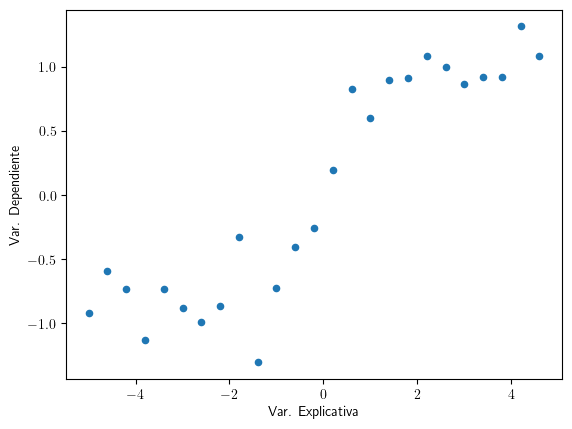

In [63]:
import C01
C01.variables_plot()

## Funciones de distribución

### Función de masa/densidad de probabilidad

- Describen la probabilidad relativa de una variable a tomar un cierto valor.

- Se nombran diferente de acuerdo al tipo de variable aleatoria a la que están
  aplicadas:

  - Variables continuas: Función de densidad de probabilidad (**PDF** por
    Probability Density Function)

  - Variables discreta: Función de masa de probabilidad (**PMF** por Probability
    Mass Function)

- El área bajo la curva es la probabilidad.
  - PMF:
    - $PMF_X(a) = \text{probabilidad de obtener X = a}$
    - El valor de $PMF_X$ está en el rango $[0, 1]$ para todo el dominio.

  - PDF:
    - No tienen sentido evaluarlas en un punto del dominio.
    - Para obtener un probabilidad debemos integrar la función en un intervalo:
      - $\int_a^b{PDF_X{(x)}dx} = P(a\leq X \leq b)$

- El área total bajo la curva es siempre igual a uno.

  - PMF: $\sum_{x}PMF_X(x) = 1$
  - PDF: $\int{PDF_X(x)dx} = 1$


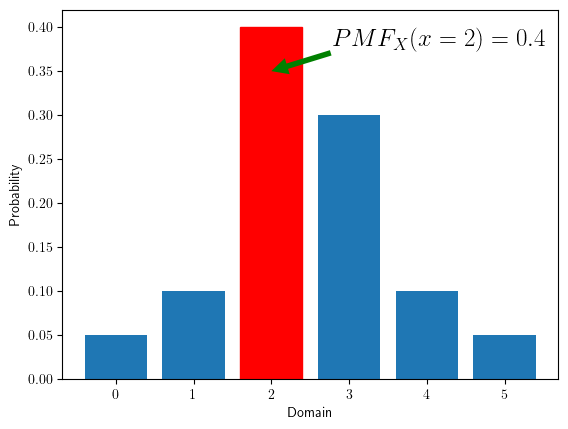

In [130]:
import C01

C01.pmf_example()

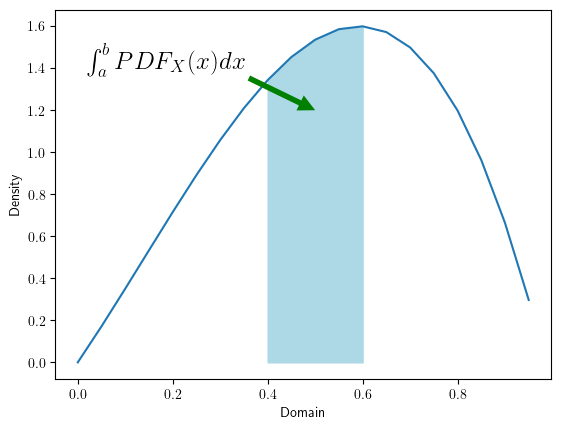

In [197]:
C01.pdf_example()

### Funciones de distribución acumulada

Es una función que retorna la probabilidad de que una variable aleatoria no
nominal sea menor o igual a un determinado valor.

- $F_X(x) = P(X\leq x)$

- Tienen diferentes nombres dependiendo del tipo de variable.
  - Para variables continuas: CDF (Cummulative density function):
    - $ CDF_X(x) = \int_{-\infty}^{x} PDF_X(u) du $
  - Para variables categóricas: CMF (Cummulative mass function):
    - $ CMF_X{x} = \sum\limits_{X \leqslant x} PMF_X(x) $

- La imagen es el intervalo $[0, 1]$.
- Es monótona creciente.
- Es fácil obtener la probabilidad de que un valor de $X$ caiga dentro de un
  cierto intervalo $(a,b]$ usando su $CDF$:
  - $P(a < X \leqslant b) = CDF_X(b) - CDF_X(a)$

- Para calcular la probabilidad de observar un valor mayor a otro dado:
  - $CCDF(x) = P(X > x) = 1 - CDF(x)$
  - (*Complementary Cumulative Distribution Function*, **CCDF**)


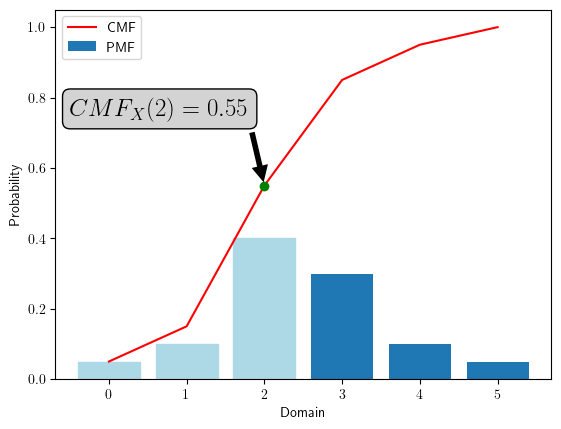

In [236]:
import C01
C01.cmf_example()

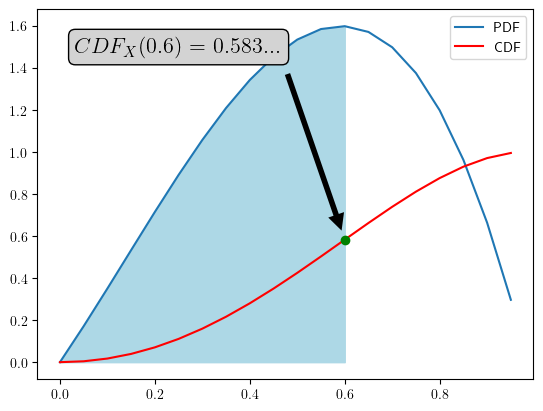

In [241]:
import C01
C01.cdf_example()


## Niveles de medición

- Una *variable aleatoria* es una función que puede tomar una serie de valores medibles u observables.
- La frecuencia de aparición de los valores está asociada a una
  distribución de probabilidad.
- Estas variables resultan de *experimentos aleatorios*.
  - Dada las mismas condiciones iniciales no se obtienen los mismos resultados en cada *experiencia* o *prueba*.

- Los resultados de una *variable aleatoria* pueden medirse en diferentes *escalas de medida*:

| Nivel | Variable | Precisión | Descripción  | Operaciones |
|-------|----------|-----------|--------------|-------------|
| Nominal | Cualitativas | Menor | No hay orden | `==` `!=` |
| Ordinal | Cualitativas, Cuantitativas | Intermedia | Hay orden pero no hay distancias | ... `<` `>` `<=` `>=` |
| Intervalar | Cuantitativas | Intermedia | El cero/la escala es arbitrario/a | ... `+` `-` |
| Racional | Cuantitativas | Mayor | El cero/la escala no es arbitrario/a | ... `/` `//` ... *(todas)* |



## Distribuciones importantes

La distribuciones más conocidas para datos continuos son:

- la distribución Normal
- la distribución T.

Mientras las distribuciones más importantes para datos categóricos son:

- la **Binomial**,
- la **Multinomial**
- la **Poisson**.


In [ ]:
https://modelassist.epixanalytics.com/display/EA/Parametric+and+non-parametric+distributions


### Distribución Normal

- También llamada *Distribución de Gauss* o *Gaussiana*.
- Su función de densidad de probabilidad es la *campana de Gauss*.
- Tiene dos parámetros de forma:
  - el promedio μ
  - la desviación estándar σ
- Una distribución normal con parametros $μ=0$ y $σ=1$ se conoce como **normal estándar**:
  - $\mathcal{N}(0,1)$
- La ecuación de la distribución normal es:
  - $f(x, μ, σ) = \frac{1}{σ\sqrt{2 π}}exp \Bigg( {-\frac{(x - μ)^2}{2σ^2}} \Bigg)$

Las distribuciones que poseen parámetros de forma, como la distribución Normal,
se denominan distribuciones paramétricas. Estás definen una familia de funciones
de densidad/masa de probabilidad, dependiendo de los parámetros que tomen.




```{r}
par(mfrow=c(1,3))
log_norm <- function(x) dnorm(x, log=TRUE)
curve(dnorm, -3, 3, col = 'blue', lwd=2, main="Normal")
curve(log_norm, -5, 5, col = "violet", main="log Normal")
curve(log_norm, -15, 15, col = "violet", main="log Normal")

```



```{r}
par(mfrow=c(1,1))
log_norm <- function(x) dnorm(x, log=TRUE)
curve(dnorm, -3, 3, col = 'blue', lwd=2, main="Normal distribution", ylim=c(0,1))
polygon(c(-3,seq(-3,1,0.1),1),c(0,dnorm(seq(-3,1,0.1)),0),col='#aaCDFF')
curve(pnorm, -3, 3, col = "violet", add=TRUE, lwd=2)
arrows(0, 0.2, 1 -0.05,pnorm(1)-0.025, lwd=2, code=2, length = 0.15)
points(1, pnorm(1), col='red', pch=19)
text(x=1+0.05, y=pnorm(1), "(1, 0.841...)", adj = c(0, 0.5))
legend(-3, 1, legend=c("density (dnorm)", "cummulative (pnorm)"),
       col=c("blue", "violet"), lty=1, cex=0.8)

arrows(1.5, 0.4, 1 + 0.05, 0+0.025, lwd=2, code=2, length = 0.15)
text(x=1.5+0.05, 0.4 + 0.05, "qnorm(0.841...)", adj = c(0, 0.5))

points(1, -0.02, col='red', pch=19)

```

```{r}
σs = c(0.5, 1, 2, 4)
par(mfrow=c(2,2))
log_norm <- function(x) dnorm(x, log=TRUE)
for (σ in σs) {
  f <- function(x) dnorm(x, sd=σ)
  curve(f, -6, 6, col = 'blue', lwd=2, main="Normal distribution", ylim=c(0,1.2))
  arrows(-σ, dnorm(0, sd=σ)+0.1, σ, dnorm(0, sd=σ)+0.1, code=3, length=0.05)
  text(0, dnorm(0, sd=σ)+0.3, paste0("sigma = ", σ))
}
```

Esta distribución es importante debido al **Teorema Central del Límite**, según el cual, dada una muestra de valores *independientes e idénticamente distribuidos* de tamaño $n$ de una distribución con media poblacional $\mu$ y desviación estándar $\sigma$, la distribución de la media muestral $\overline{x_{n}}$ converge a una distribución

$$\overline{x_{n}} \sim \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}})$$
cuando $n \rightarrow \infty$

Debido a la **ley de los grandes números**, la media o promedio de la muestra se acercara a la media poblacional (valor esperado) a medida que el valor de $n$ aumenta. La desviación estándar de la distribución media muestral $\frac{\sigma}{\sqrt{n}}$ se denomina error estadístico.

```{r}
m <- sapply(c(1,2,3,4),function(x) x^2)
m
```

```{r}
par(mfrow=c(2,2))
sample_size <- c(10000, 50000)
for (s in sample_size) {
  samples <- sapply(1:5000, function(x) {rexp(s)})
  # Samples tiene 50 muestras de s elementos 
  # samples es una matriz
  hist(samples[,1], 100, xlim=c(0,5), main=paste("Exp", s, "elements"))
  
  mean_dist <- apply(samples, 2, mean)
  hist(mean_dist, 50, main=paste("Dist. of means."))
}
```



#### Generación de datos aleatorios de una distribución normal

```{r}
par(mfrow=c(2,2))
sample_size = c(10, 500, 1000, 5000)
samples <- sapply(sample_size, rnorm)
class(samples)
for (sample in samples) {
  hist(sample, 100, xlim=c(-4,4))
}
```



### Distribución T

La distribución T (de *Student*) con $n-1$ grados de libertad es la distribución que sigue la media de una muestra pequeña de tamaño $n$ cuando se le sustrae la media poblacional y se divide al valor restante por la desviación estándar de la muestra sobre $\sqrt{n}$, sólo si la población de la cual se obtiene la muestra tiene una **distribución normal**.

$$t = \frac{\overline{X_{n}}-\mu}{\frac{S_{n}}{\sqrt{n}}}$$
$$PDF_{T}(x, n) = \frac{\Gamma (\frac{n+1}{2})}{\sqrt{n\pi}\times \Gamma(\frac{n}{2})}\bigg(1+\frac{x^2}{2}\bigg)^{-\frac{n+1}{2}}$$
Donde $n$ son los grados de libertad.

La distribución T converge hacia una distribución normal $\mathcal{N}(0,1)$ cuando $n \rightarrow \infty$.

```{r}
t_student <- function(x, n) {
  gamma((n+1)/2)/(sqrt(pi*n)*gamma(n/2)) * (1+x^2/n)^(-(n+1)/2)
}
t_student(2,5)
dt(2,5)

?dt
```

```{r}
curve(dnorm, -3, 3, col = 'red', lwd=2, main="Student T distribution", ylim=c(0,0.45), ylab="P. density")
freedom_degrees <- c(2, 4, 8, 15, 20, 30)
for (dg in freedom_degrees) {
  dt10 <- function(x) {dt(x, dg)}
  curve(dt10, -3, 3, col = 'blue', lwd=1, add=TRUE)
}

```




### Binomial

La distribución binomial se utiliza con variables categóricas que sólo pueden tomar dos valores (dicotómicas) los cuales suelen denominarse *éxito* (`1`, `true`) y *fracaso* (`0`, `false`) generalmente (aunque no estén relacionados con la idea de éxito). El número de éxitos productos de $n$ ensayos (*ensayos de Bernoulli*) sigue una distribución binomial con parámetros $n$ y $p$, donde $p$ es la probabilidad de éxitos.
La distribución Binomial(n,p) asumen que el valor de $n$ fue fijado y que $p$ es igual en cada uno de los $n$ ensayos. Es decir que **ensayos idénticos** (mismo $p$) e **independientes** dado que un ensayo no afecta a la probabilidad de otro.

$$P(X=k) = {n\choose k}p^k(1-p)^{n-k}, 0 \leq k \leq n$$


$$ {n \choose k} = \frac{n!}{(n-k)!k!} $$
```{r}
par(mfrow=c(1,2))
success_probability <- 0.8
trials <- 10
success <- c(0:trials)
success_mass_p <- sapply(success, function(x)dbinom(x, trials, success_probability))
plot(
  x=c(0:trials),
  success_mass_p,
  pch=19,
  main="Mass Binomial Probability",
  xlab="successful trials",
  ylab="probability")

success_cumm_p <- sapply(success, function(x)pbinom(x, trials, success_probability))

plot(
  success_cumm_p,
  pch=19,
  main="Cummulative Binomial Probability",
  xlab="successful trials",
  ylab="probability")

```



### Distribución Multinomial

La distribución multinomial es una generalización de la **distribución binomial**, pudiendo representar más de dos categorías. Para $n$ ensayos independientes que pueden dar un *éxito* solo en una de $k$ categorías, teniendo cada categoría una probabilidad de éxito fija, la distribución multinomial da la probabilidad de una combinación de números de éxitos particular para varias categorías. Los parámetros de la distribución multinomial son $n$ y la probabilidad de éxito $p_{k}$ de cada categoría $k$.

$$ \frac{n!}{x_1! \dotsm x_k!}p_1^{x_1} \dotsm {p_k^{x_k}}$$

¿Cuál es la probabilidad de obtener generala servida?

Generala son 5 veces la misma cara.
Hay una generala posible por cada cara.

```{r}
pk <- c(1/2, 1/10, 1/10, 1/10, 1/10, 1/10)
dados <- c(5,0,0,0,0,0)
n_dados <- 5
pg1 <- dmultinom(
  dados,
  n_dados,
  pk)


dados <- c(0,5,0,0,0,0)
n_dados <- 5
pg2_6 <- 5*dmultinom(
  dados,
  n_dados,
  pk)

pg <- pg1 + pg2_6
```


### Poisson Distribution

Describe la cantidad de eventos (independiente) que ocurren dentro de una unidad de tiempo.

$$PMF(k, \lambda) = \frac{\lambda^k}{k!}e^{-\lambda}$$

```{r}
lambdas <- c(1,2,5,10)
events <- c(0:15)
ys = sapply(lambdas, function(l) dpois(events, l))
plot(x=events, y=ys[,1], pch=19, col="red", type="o")
lines(x=events, y=ys[,2], pch=19, col="blue", type="o")
lines(x=events, y=ys[,3], pch=19, col="green", type="o")
lines(x=events, y=ys[,4], pch=19, col="violet", type="o")
legend(10, 0.35, legend=c("lambda: 1", "lambda: 2","lambda: 5", "lambda: 10"),
       col=c("red", "blue", "green", "violet"), lty=1, cex=0.8, pch=19)
```




